## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [8]:
import os
import keras

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio), name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio), name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name="output")(x) # 為什麼out in 不用regularizations
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
BATCH_SIZE = 256
LEARNING_RATE = 1e-3
EPOCHS = 10
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [14]:
results = {}
import itertools
for l1r, l2r in itertools.product(L1_EXP,L2_EXP):
    keras.backend.clear_session()
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    
    model  = build_mlp(x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    model.summary()
    model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss = model.history.history["loss"]
    val_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    val_acc = model.history.history["val_accuracy"]
    
    name = "exp-l1-%s-l2-%s" %(l1r, l2r)
    results[name] = {
        "train_loss": train_loss,
        "val_loss": val_loss,
        "train_acc": train_acc,
        "val_acc": val_acc}

Experiment with L1 = 0.010000, L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 62us/step - loss: 198.7803 - accuracy: 0.2383 - val_loss: 41.1881 - val_accuracy: 0.2574
Epoch 2/10
50000/50000 [==============================] - 3s 56us/step - loss: 19.1442 - accuracy: 0.1171 - val_loss: 7.3221 - val_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 3s 55us/step - loss: 4.1331 - accuracy: 0.1000 - val_loss: 2.6540 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 3s 56us/step - loss: 2.4872 - accuracy: 0.0975 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 3s 56us/step - loss: 2.4626 - accuracy: 0.0962 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 3s 56us/step - loss: 2.4626 - accuracy: 0.0986 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [==============================] - 3s 55u

50000/50000 [==============================] - 3s 57us/step - loss: 5.7015 - accuracy: 0.3958 - val_loss: 5.6318 - val_accuracy: 0.4074
Epoch 4/10
50000/50000 [==============================] - 3s 56us/step - loss: 5.5734 - accuracy: 0.4143 - val_loss: 5.5204 - val_accuracy: 0.4209
Epoch 5/10
50000/50000 [==============================] - 3s 57us/step - loss: 5.4583 - accuracy: 0.4307 - val_loss: 5.4073 - val_accuracy: 0.4387
Epoch 6/10
50000/50000 [==============================] - 3s 56us/step - loss: 5.3511 - accuracy: 0.4438 - val_loss: 5.3247 - val_accuracy: 0.4380
Epoch 7/10
50000/50000 [==============================] - 3s 56us/step - loss: 5.2493 - accuracy: 0.4576 - val_loss: 5.2232 - val_accuracy: 0.4474
Epoch 8/10
50000/50000 [==============================] - 3s 56us/step - loss: 5.1525 - accuracy: 0.4652 - val_loss: 5.1307 - val_accuracy: 0.4548
Epoch 9/10
50000/50000 [==============================] - 3s 57us/step - loss: 5.0601 - accuracy: 0.4755 - val_loss: 5.0395 - val

50000/50000 [==============================] - 3s 53us/step - loss: 5.2468 - accuracy: 0.4435 - val_loss: 5.2081 - val_accuracy: 0.4481
Epoch 7/10
50000/50000 [==============================] - 3s 53us/step - loss: 5.1499 - accuracy: 0.4538 - val_loss: 5.1168 - val_accuracy: 0.4526
Epoch 8/10
50000/50000 [==============================] - 3s 53us/step - loss: 5.0583 - accuracy: 0.4653 - val_loss: 5.0468 - val_accuracy: 0.4520
Epoch 9/10
50000/50000 [==============================] - 3s 53us/step - loss: 4.9713 - accuracy: 0.4733 - val_loss: 4.9606 - val_accuracy: 0.4630
Epoch 10/10
50000/50000 [==============================] - 3s 53us/step - loss: 4.8866 - accuracy: 0.4817 - val_loss: 4.9026 - val_accuracy: 0.4584
Experiment with L1 = 0.000000, L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________

50000/50000 [==============================] - 3s 56us/step - loss: 1.4825 - accuracy: 0.4798 - val_loss: 1.5182 - val_accuracy: 0.4596
Epoch 10/10
50000/50000 [==============================] - 3s 57us/step - loss: 1.4574 - accuracy: 0.4896 - val_loss: 1.4931 - val_accuracy: 0.4713
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
____________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 62us/step - loss: 2.1549 - accuracy: 0.2757 - val_loss: 1.9953 - val_accuracy: 0.3492
Epoch 2/10
50000/50000 [==============================] - 3s 56us/step - loss: 1.9328 - accuracy: 0.3720 - val_loss: 1.8937 - val_accuracy: 0.3788
Epoch 3/10
50000/50000 [==============================] - 3s 56us/step - loss: 1.8477 - accuracy: 0.4024 - val_loss: 1.8207 - val_accuracy: 0.4044
Epoch 4/10
50000/50000 [==============================] - 3s 56us/step - loss: 1.7910 - accuracy: 0.4230 - val_loss: 1.7699 - val_accuracy: 0.4284
Epoch 5/10
50000/50000 [==============================] - 3s 56us/step - loss: 1.7476 - accuracy: 0.4384 - val_loss: 1.7342 - val_accuracy: 0.4377
Epoch 6/10
50000/50000 [==============================] - 3s 56us/step - loss: 1.7102 - accuracy: 0.4514 - val_loss: 1.7150 - val_accuracy: 0.4420
Epoch 7/10
50000/50000 [==============================] - 3s 56us/st

Epoch 4/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.6646 - accuracy: 0.4134 - val_loss: 1.6449 - val_accuracy: 0.4207
Epoch 5/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.6192 - accuracy: 0.4326 - val_loss: 1.6161 - val_accuracy: 0.4270
Epoch 6/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.5817 - accuracy: 0.4445 - val_loss: 1.5803 - val_accuracy: 0.4440
Epoch 7/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.5485 - accuracy: 0.4557 - val_loss: 1.5582 - val_accuracy: 0.4554
Epoch 8/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.5208 - accuracy: 0.4668 - val_loss: 1.5257 - val_accuracy: 0.4640
Epoch 9/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.4929 - accuracy: 0.4754 - val_loss: 1.5113 - val_accuracy: 0.4692
Epoch 10/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.4684 - accuracy: 0.4856 - val_loss: 

Epoch 7/10
50000/50000 [==============================] - 3s 52us/step - loss: 1.5341 - accuracy: 0.4616 - val_loss: 1.5364 - val_accuracy: 0.4572
Epoch 8/10
50000/50000 [==============================] - 3s 52us/step - loss: 1.5049 - accuracy: 0.4733 - val_loss: 1.5223 - val_accuracy: 0.4604
Epoch 9/10
50000/50000 [==============================] - 3s 52us/step - loss: 1.4777 - accuracy: 0.4827 - val_loss: 1.5021 - val_accuracy: 0.4727
Epoch 10/10
50000/50000 [==============================] - 3s 58us/step - loss: 1.4531 - accuracy: 0.4904 - val_loss: 1.4829 - val_accuracy: 0.4762
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

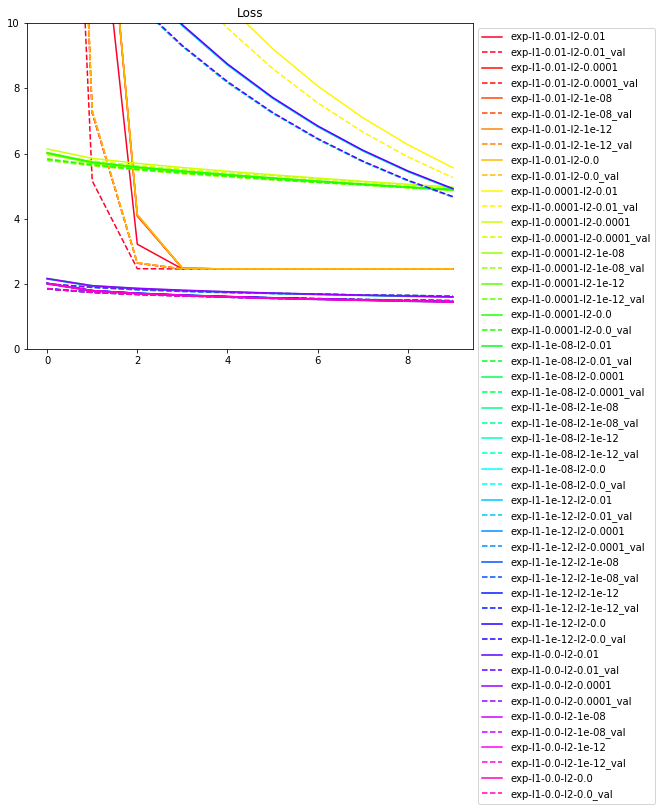

In [30]:
plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])), results[cond]["train_loss"], '-', c=color_bar[i], label=cond)
    plt.plot(range(len(results[cond]["val_loss"])), results[cond]["val_loss"], '--', c=color_bar[i], label=cond+"_val")
plt.title('Loss')
plt.ylim([0,10])
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.show()

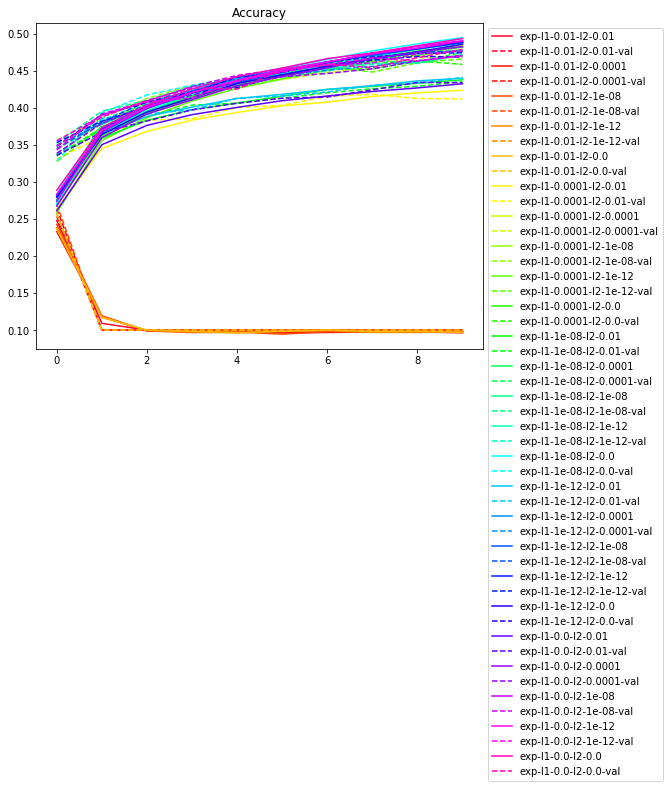

In [33]:
plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])), results[cond]["train_acc"], '-', c=color_bar[i], label=cond)
    plt.plot(range(len(results[cond]["val_acc"])), results[cond]["val_acc"], '--', c=color_bar[i], label=cond+'-val')
plt.title("Accuracy")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()